In [2]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
 
file_names = ['97.mat','105.mat','118.mat','130.mat','169.mat','185.mat','197.mat','209.mat','222.mat','234.mat']
 
for file in file_names:
    # 读取MAT文件
    data = loadmat(f'../data_files/ODS\\{file}')
    print(list(data.keys()))

['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM']
['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM']
['__header__', '__version__', '__globals__', 'X118_DE_time', 'X118_FE_time', 'X118_BA_time', 'X118RPM']
['__header__', '__version__', '__globals__', 'X130_DE_time', 'X130_FE_time', 'X130_BA_time', 'X130RPM']
['__header__', '__version__', '__globals__', 'X169_DE_time', 'X169_FE_time', 'X169_BA_time', 'X169RPM']
['__header__', '__version__', '__globals__', 'X185_DE_time', 'X185_FE_time', 'X185_BA_time', 'X185RPM']
['__header__', '__version__', '__globals__', 'X197_DE_time', 'X197_FE_time', 'X197_BA_time', 'X197RPM']
['__header__', '__version__', '__globals__', 'X209_DE_time', 'X209_FE_time', 'X209_BA_time', 'X209RPM']
['__header__', '__version__', '__globals__', 'X222_DE_time', 'X222_FE_time', 'X222_BA_time', 'X222RPM']
['__header__', '__version__', '__globals__', 'X234_DE_time', 'X234_FE_time', 'X2

In [3]:
# 采用驱动端数据
data_columns = ['X097_DE_time', 'X105_DE_time', 'X118_DE_time', 'X130_DE_time', 'X169_DE_time',
                'X185_DE_time','X197_DE_time','X209_DE_time','X222_DE_time','X234_DE_time']
columns_name = ['97','105','118','130','169','185','197','209','222',"234"]
data_12k_10c = pd.DataFrame()
for index in range(10):
    # 读取MAT文件
    data = loadmat(f'../data_files/ODS\\{file_names[index]}')
    dataList = data[data_columns[index]].reshape(-1)
    data_12k_10c[columns_name[index]] = dataList[:119808]  # 121048  min: 121265
print(data_12k_10c.shape)
data_12k_10c

(119808, 10)


,97,105,118,130,169,185,197,209,222,234
0,0.053197,-0.083004,-0.002761,0.008528,-0.223836,-0.467813,0.002274,1.189431,-0.007959,0.104365
1,0.088662,-0.195734,-0.096324,0.423550,-0.209541,0.179004,-0.104948,-0.177866,0.025340,0.017462
2,0.099718,0.233419,0.113705,0.012995,0.345337,0.481295,0.082010,-0.774816,0.000162,0.116547
3,0.058621,0.103958,0.257297,-0.265175,0.158862,-0.158212,0.094027,0.501518,0.092913,0.371164
4,-0.004590,-0.181115,-0.058314,0.237155,-0.206617,-0.326819,-0.160081,0.993697,-0.007797,0.356951
...,...,...,...,...,...,...,...,...,...,...
119803,0.002712,0.046781,-0.239592,-0.122232,0.046781,-0.002274,-0.056920,-0.296850,0.018842,-0.024365
119804,0.016689,-0.071309,0.013482,-1.248720,-0.090314,-0.042883,0.048475,0.060913,-0.075370,-0.044264
119805,0.008762,-0.175917,0.217663,0.587609,0.026639,-0.027289,0.107100,0.148628,0.032162,0.042639
119806,-0.034004,-0.290759,-0.016081,0.352890,0.097136,-0.035736,-0.033332,-0.139288,0.152364,-0.059289


In [38]:
# 定义滑动窗口大小和步长
window_size = 1024
stride = int(window_size / 2)  # 此处使用了 50% 的重叠率
result_transpose_df=pd.DataFrame()
for futures_name in columns_name:
    data_array=data_12k_10c[futures_name]
    # 创建滑动窗口
    rolling_window = np.lib.stride_tricks.sliding_window_view(data_array, window_shape=window_size)
    # 提取具有给定步长的子数组
    rolling_window = rolling_window[::stride]
    for window_data in rolling_window:
        arr=window_data
        scalar_value = float(futures_name)
        # 使用 concatenate() 函数将标量追加到数组末尾
        new_arr = np.concatenate([arr, [scalar_value]])
        rolling_window_df=pd.DataFrame(new_arr)
                # 将滑动窗口中的数据组合成一个新的 DataFrame 对象
        result_transpose_df = pd.concat([result_transpose_df, rolling_window_df], axis=1, ignore_index=True)

result_df=result_transpose_df.transpose()
# 检查结果
print(result_df.shape)  # 输出 (n, 1024)

(2330, 1025)


In [4]:
import numpy as np
import pandas as pd
result_temp_df=pd.read_csv("../data_files/CDM/origin_datas0.csv")
# 去掉第一列（通常是ID列）来创建新的DataFrame X  
result_df = result_temp_df.iloc[:, 1:]  # 使用iloc并选择所有行，从第二列（索引为1）开始到最后一列  
result_df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.053197,0.088662,0.099718,0.058621,-0.004590,-0.056952,-0.071764,-0.058621,-0.046521,-0.049859,...,-0.041097,-0.063628,-0.040889,0.008136,0.049650,0.074893,0.104516,0.151872,0.160217,97.0
1,0.077396,0.096589,0.098258,0.083863,0.036090,-0.037759,-0.093877,-0.117659,-0.089496,-0.025868,...,0.055700,0.080943,0.110983,0.140607,0.165015,0.155210,0.108897,0.047564,-0.002295,97.0
2,0.134766,0.085115,0.015020,-0.029623,-0.040263,-0.015229,0.012308,0.033796,0.069052,0.098884,...,-0.017315,-0.023574,-0.034004,-0.044852,-0.038802,-0.016689,0.000209,-0.021905,-0.071138,97.0
3,-0.017524,-0.018150,-0.023574,-0.030249,-0.022739,0.015020,0.069469,0.101178,0.095129,0.064671,...,0.023991,0.047564,0.055074,0.002086,-0.071138,-0.135600,-0.173151,-0.161886,-0.130593,97.0
4,-0.095546,-0.091374,-0.056535,-0.021279,-0.010431,-0.014603,-0.021696,-0.011474,0.006050,0.000000,...,0.061333,0.017315,-0.008553,0.006676,0.027954,0.028372,0.027746,0.020236,0.042349,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,-0.281419,0.108425,-0.071878,-0.243247,0.018680,-0.052791,-0.235531,0.025990,0.359794,0.175836,...,-0.182740,0.510046,0.218475,-0.387002,-0.010558,0.329337,-0.225379,-0.376443,0.075126,234.0
2326,0.094618,0.002030,-0.022335,-0.001624,0.175024,0.140100,-0.074314,-0.123045,0.038172,0.073502,...,-0.032081,-0.074314,0.048324,-0.106395,-0.281419,-0.194922,-0.185988,-0.130354,0.048731,234.0
2327,-0.237967,-0.419489,0.242841,0.320403,-0.328525,-0.408524,0.213196,0.226191,-0.363449,-0.160811,...,0.250150,0.168120,-0.154719,-0.117359,0.043451,-0.023147,-0.108832,0.045482,0.084872,234.0
2328,0.058071,0.036954,0.109644,0.161217,0.204262,0.098273,-0.116953,-0.004467,0.224567,0.172993,...,-0.042233,-0.062944,0.073502,0.114111,0.007716,-0.065380,-0.071878,0.120202,0.253805,234.0


In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder  

# 提取特征变量 X，不包含最后一列  
X_temp = result_df.iloc[:, :-1]  # 使用iloc并选择所有行和除了最后一列的所有列  
# 转换特征变量 X，为numpy.ndarray类型,和堆叠操作
X_array = X_temp.to_numpy()
X = X_array.reshape(X_temp.shape[0], 32, 32)

# 使用 .iloc 方法选择最后一列作为一个新的 DataFrame
y_temp = result_df.iloc[:, -1:]
y_encoded_labels_temp=y_temp.to_numpy()
# 创建一个LabelEncoder对象  
le = LabelEncoder()  
# 使用fit_transform方法对标签进行序列编码，独热编码
y_one_hot_encoded_temp = le.fit_transform(y_encoded_labels_temp)  
num_classes = len(np.unique(y_one_hot_encoded_temp))
y = to_categorical(y_one_hot_encoded_temp, num_classes=num_classes)  
#保存y的值映射表
original_labels = le.inverse_transform(y_one_hot_encoded_temp)  
unique_original_labels_only = np.unique(original_labels)
# 将一维数组转换为pandas Series，然后保存为DataFrame（默认只有一列）  
unique_original_labels_only_df = pd.DataFrame(unique_original_labels_only, columns=['Column_Name'])  
unique_original_labels_only_df.to_csv('../data_files/ADS/unique_original_labels_only.csv', index=False)  # index=False避免保存行索引 

C:\Users\chell\anaconda3\envs\ClassifyBearing\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
# 首先划分训练集和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_test.shape

(array([[[-6.02892216e-02, -1.45343713e-02,  1.03323952e-01, ...,
           1.33570060e-02,  2.85003593e-02, -6.06546108e-02],
         [-1.48185629e-02,  4.30347305e-02, -6.80029940e-02, ...,
           1.29104192e-02,  4.95305389e-02, -3.64983234e-02],
         [ 7.10479042e-03, -5.64323353e-03, -2.33443114e-02, ...,
          -3.36970060e-02, -4.83125749e-03, -3.65795210e-02],
         ...,
         [ 5.79344910e-02, -2.67952096e-03,  1.26262275e-02, ...,
           1.40553054e-01, -4.41308982e-02, -1.04744910e-01],
         [ 6.70692216e-02, -3.65389222e-04, -1.85130539e-02, ...,
           1.37508144e-01, -1.24475928e-01, -5.66759281e-02],
         [ 7.22658683e-03, -1.58660120e-01, -4.06800000e-02, ...,
           1.62963593e-01,  4.14107784e-03,  5.48083832e-02]],
 
        [[-4.06087824e-02, -9.51869860e-02,  1.80140559e-01, ...,
          -1.81764910e-01,  3.83022036e-01,  2.39266946e-01],
         [-6.18552974e-01, -1.29785669e-01,  7.99343273e-01, ...,
           8.96641916

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
import keras

# 创建一个 Sequential 模型
model = Sequential()

# 添加一个 LSTM 层，输入形状为 (时间步长, 特征数量)，这里假设时间步长为 10，特征数量为 X 的列数
model.add(LSTM(units=256, return_sequences=True, input_shape=(32,32)))

# 添加第二层 LSTM，最后一层不需要返回序列
model.add(LSTM(units=128))
# 添加Dropout,正则化，防止过拟合
model.add(Dropout(0.5))
# 添加一个全连接层作为输出层，使用 sigmoid 激活函数进行二分类
model.add(Dense(units=10, activation='sigmoid'))

# 编译模型，使用交叉熵作为损失函数
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 回调函数
class StopAtAccuracy(keras.callbacks.Callback):  
    def on_epoch_end(self, epoch, logs=None):  
        if logs and logs.get('val_accuracy') is not None:  
            if logs['val_accuracy'] >= 0.95:  # 当验证准确率大于或等于95%时停止训练  
                print(f'\nReached {logs["val_accuracy"]*100:.2f}% accuracy so cancelling training!')  
                self.model.stop_training = True  
# 训练模型
# 创建自定义回调实例  
stop_at_accuracy = StopAtAccuracy()  
  
# 训练模型，传入自定义回调作为回调  
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[stop_at_accuracy])



Epoch 1/50


47/47 [==============================] - 55s 632ms/step - loss: 1.8748 - accuracy: 0.2817 - val_loss: 1.2223 - val_accuracy: 0.5818
Epoch 2/50
47/47 [==============================] - 24s 520ms/step - loss: 1.0791 - accuracy: 0.5755 - val_loss: 0.8744 - val_accuracy: 0.6944
Epoch 3/50
19/47 [===========>..................] - ETA: 16s - loss: 0.7908 - accuracy: 0.6875

KeyboardInterrupt: 

In [33]:
# 保存模型到磁盘  
model.save('LSTM_model.keras')  # 创建model文件 'LSTM_model.keras'

In [34]:
# 评估模型  
loss, accuracy = model.evaluate(X_test, y_test)  
print(f'Test loss: {loss:.4f}')  
print(f'Test accuracy: {accuracy:.4f}')

15/15 [==============================] - 2s 105ms/step - loss: 0.0889 - accuracy: 0.9742
Test loss: 0.0889
Test accuracy: 0.9742


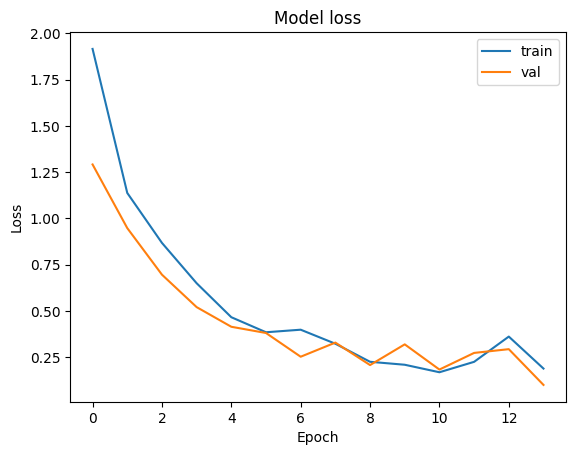

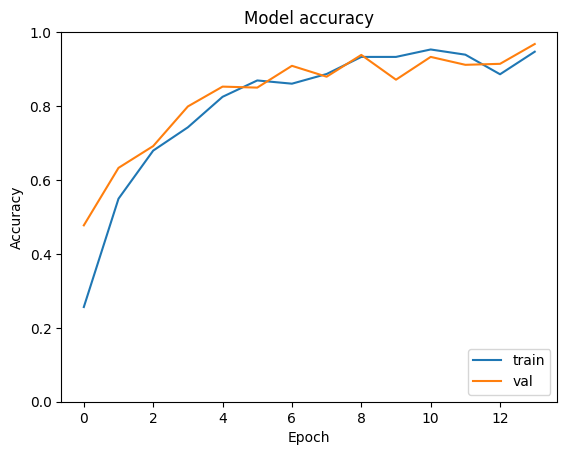

In [36]:
import matplotlib.pyplot as plt 
# 绘制训练loss和验证loss  
plt.plot(history.history['loss'], label='train')  
plt.plot(history.history['val_loss'], label='val')  
plt.legend(loc='upper right')  
plt.title('Model loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.show()  
  
# 绘制训练accuracy和验证accuracy  
plt.plot(history.history['accuracy'], label='train')  
plt.plot(history.history['val_accuracy'], label='val')  
plt.legend(loc='lower right')  
plt.title('Model accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.ylim(ymin=0, ymax=1)  # 设置y轴的范围为0到1  
plt.show()